# 機械学習コンペ 分類問題 サンプルノートブック

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

## コンペ配布データ読み込み

### 学習用データ読み込み

In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df.head(5)

,id,feature_0,feature_1,target
0,0,0.214094,-1.245739,1
1,1,0.529804,1.441569,1
2,2,0.177701,-1.335344,1
3,3,-1.143726,0.108560,1
4,4,0.224092,0.012592,0


### 評価用データ読み込み

In [4]:
test_df = pd.read_csv("./data/test.csv")

In [5]:
test_df.head(5)

,id,feature_0,feature_1
0,1000,-0.641482,0.431923
1,1001,0.166452,0.492451
2,1002,1.227669,-1.209641
3,1003,0.018418,1.676437
4,1004,0.381935,0.430042


### サンプル投稿ファイル読み込み

In [6]:
submit = pd.read_csv("./data/sample_submission.csv")

In [7]:
submit.head(5)

,id,cls1_probability
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0


## 前処理

### 説明変数、目的変数に分割

In [8]:
X = train_df[["feature_0", "feature_1"]]
y = train_df["target"]

In [9]:
X.head(5)

,feature_0,feature_1
0,0.214094,-1.245739
1,0.529804,1.441569
2,0.177701,-1.335344
3,-1.143726,0.108560
4,0.224092,0.012592


In [10]:
y.head(5)

0    1
1    1
2    1
3    1
4    0
Name: target, dtype: int64

In [11]:
X_test = test_df[["feature_0", "feature_1"]]

In [12]:
X_test.head(5)

,feature_0,feature_1
0,-0.641482,0.431923
1,0.166452,0.492451
2,1.227669,-1.209641
3,0.018418,1.676437
4,0.381935,0.430042


### 訓練用データ、検証用データに分割

In [13]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y)

In [14]:
X_train.head(5)

,feature_0,feature_1
248,0.279969,-1.125489
987,1.513450,0.630812
453,-0.459361,-0.849844
927,-0.460639,1.057122
37,-0.168144,-0.472091


In [32]:
y_train.head(5)

248    1
987    1
453    0
927    1
37     0
Name: target, dtype: int64

In [16]:
X_eval.head(5)

,feature_0,feature_1
776,-0.088282,2.579709
166,0.707752,-0.562467
831,-0.269875,-0.978764
383,1.384273,0.563909
579,0.109395,0.725767


In [33]:
y_eval.head(5)

776    1
166    0
831    0
383    1
579    0
Name: target, dtype: int64

## モデルを訓練

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 訓練済みモデルによる予測（検証用データ）

In [20]:
y_pred_eval = model.predict_proba(X_eval)

In [21]:
y_pred_eval_df = pd.DataFrame(y_pred_eval)

In [22]:
y_pred_eval_df.head(5)

,0,1
0,0.376305,0.623695
1,0.489290,0.510710
2,0.522012,0.477988
3,0.432785,0.567215
4,0.446474,0.553526


予測精度の可視化

In [23]:
fpr, tpr, thresholds  = roc_curve(y_eval, y_pred_eval_df[1])
auc = roc_auc_score(y_eval, y_pred_eval_df[1])

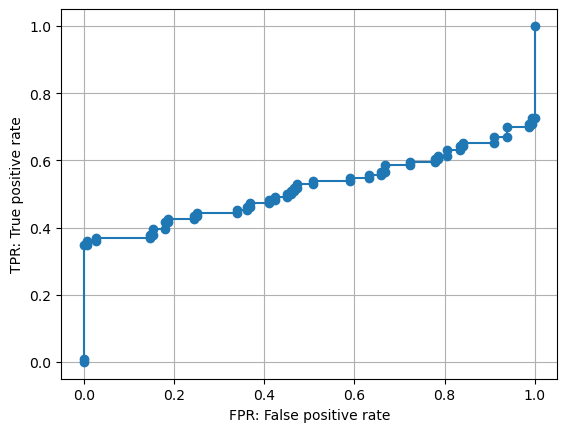

In [24]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [25]:
auc

0.5172300838574423

## 訓練済みモデルによる予測（評価用データ）

In [26]:
y_pred_test = model.predict_proba(X_test)

In [27]:
y_pred_test_df = pd.DataFrame(y_pred_test)

In [28]:
y_pred_test_df.head(5)

,0,1
0,0.470389,0.529611
1,0.455007,0.544993
2,0.507372,0.492628
3,0.409877,0.590123
4,0.454099,0.545901


## 採点用投稿ファイル作成

In [29]:
submit["cls1_probability"] = y_pred_test_df[1]

In [34]:
submit.head(5)

,id,cls1_probability
0,1000,0.529611
1,1001,0.544993
2,1002,0.492628
3,1003,0.590123
4,1004,0.545901


In [31]:
submit.to_csv("submit.csv", index=False)